<a href="https://colab.research.google.com/github/Aishwary-Katre/Machine_Learning_Projects/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
train = pd.read_csv("/content/train_ctrUa4K.csv")
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Join both the train and test dataset
train['source']='train'
test['source']='test'

dataset = pd.concat([train,test], ignore_index = True)
print("Train dataset shape:",train.shape)
print("Test dataset shape:",test.shape)
print("Concatenated dataset shape:",dataset.shape)

Train dataset shape: (614, 14)
Test dataset shape: (367, 13)
Concatenated dataset shape: (981, 14)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [ ]:
dataset.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [ ]:
print(dataset['Gender'].unique())
print(dataset['Married'].unique())
print(dataset['Dependents'].unique())
print(dataset['Self_Employed'].unique())
print(dataset['LoanAmount'].unique())
print(dataset['Loan_Amount_Term'].unique())
print(dataset['Credit_History'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243

b) replacing missing data with substituted values
Out of the features with missing NaN values, the missing values in 'Loan_Status' are the Values that need to be predicted by our model. Hence, we need not impute the NaN values in Loan_Status column.

1) Missing values in Integer and Float dtype columns are replaced by their median

2) Missing values in Object dtype columns are replaced by their mode</b>

In [ ]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median(), inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [ ]:
dataset.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [ ]:
print(len(dataset['Gender'].unique()))
print(len(dataset['Married'].unique()))
print(len(dataset['Dependents'].unique()))
print(len(dataset['Self_Employed'].unique()))
print(len(dataset['LoanAmount'].unique()))
print(len(dataset['Loan_Amount_Term'].unique()))
print(len(dataset['Credit_History'].unique()))
print(len(dataset['Loan_ID'].unique()))
print(len(dataset['Education'].unique()))
print(len(dataset['ApplicantIncome'].unique()))
print(len(dataset['CoapplicantIncome'].unique()))
print(len(dataset['Property_Area'].unique()))
print(len(dataset['source'].unique()))

2
2
4
2
232
12
2
981
2
752
437
3
2


**Spliting the train and test set again after replacing all missing values**

In [ ]:
#Divide into test and train:
train = dataset.loc[dataset['source']=="train"]
test = dataset.loc[dataset['source']=="test"]
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

<ipython-input-13-a58a8626e24b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source'],axis=1,inplace=True)
<ipython-input-13-a58a8626e24b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


**Exploratory Data Analysis**

<Axes: xlabel='Loan_Status', ylabel='count'>

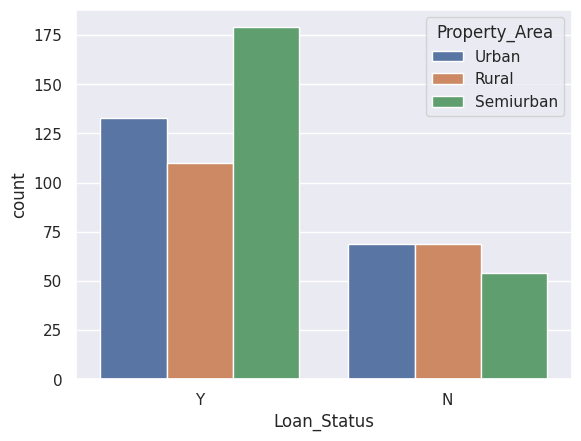

In [ ]:
sns.countplot(data=train,x='Loan_Status',hue ='Property_Area')

people living in suburban has high acceptable chance of loan status

<Axes: xlabel='Loan_Status', ylabel='count'>

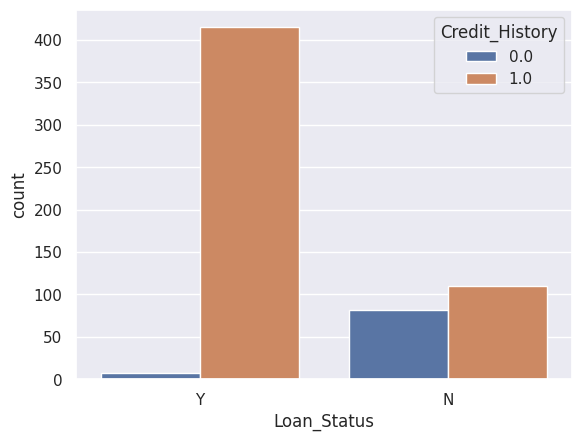

In [ ]:
sns.countplot(data=train,x='Loan_Status',hue ='Credit_History')

from this we can infer that, people with acceptable past credit history are most likely accepted in new loan.

<Axes: xlabel='Loan_Status', ylabel='count'>

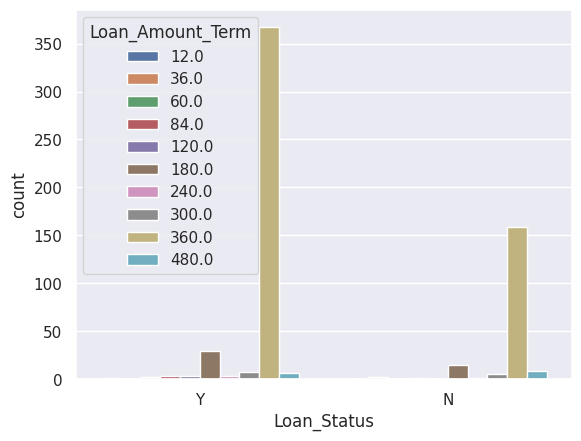

In [ ]:
sns.countplot(data=train,x='Loan_Status',hue ='Loan_Amount_Term')

people with 360 month loan term are mostly to be accepted

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

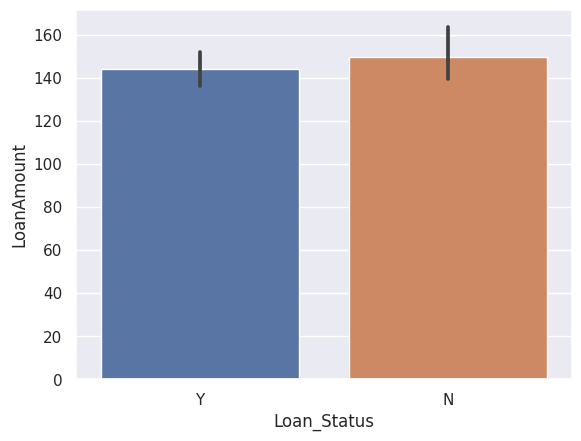

In [ ]:
sns.barplot(data=train,x='Loan_Status',y ='LoanAmount')

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

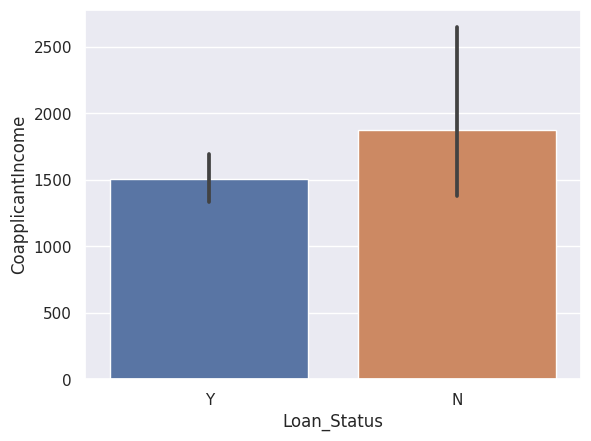

In [ ]:
sns.barplot(data=train,x='Loan_Status',y ='CoapplicantIncome')

people with high coapplicant income are mostly accepted to new loan

<Axes: xlabel='Loan_Status', ylabel='count'>

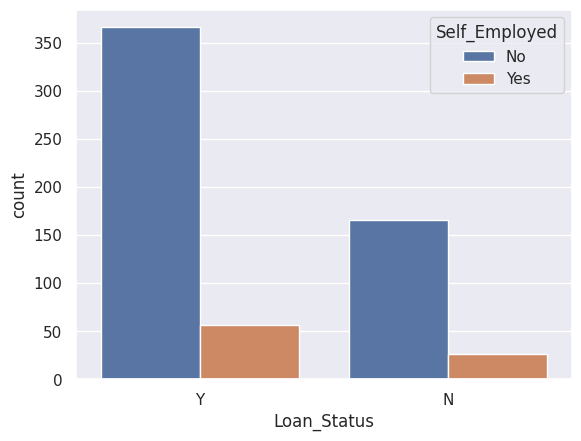

In [ ]:
sns.countplot(data=train,x='Loan_Status',hue ='Self_Employed')

<Axes: xlabel='Loan_Status', ylabel='count'>

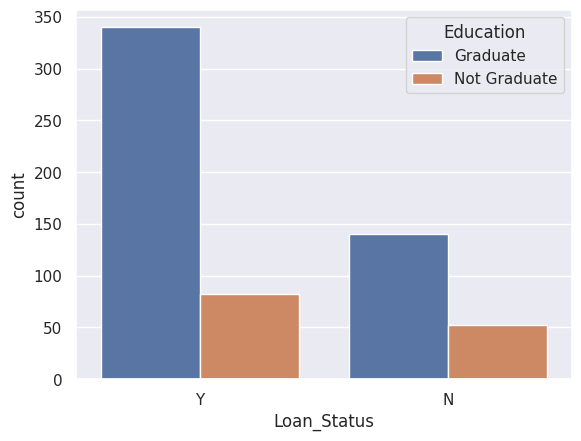

In [ ]:
sns.countplot(data=train,x='Loan_Status',hue ='Education')

<Axes: xlabel='Loan_Status', ylabel='count'>

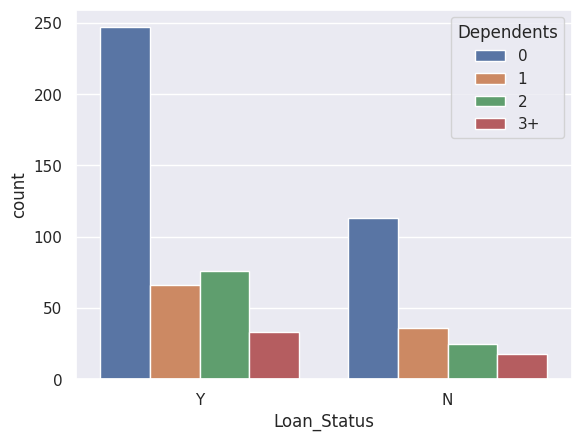

In [ ]:
sns.countplot(data=train,x='Loan_Status',hue ='Dependents')

<Axes: xlabel='Loan_Status', ylabel='count'>

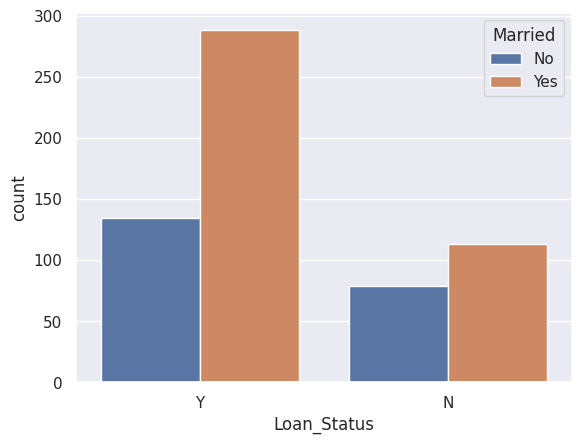

In [ ]:
sns.countplot(data=train,x='Loan_Status',hue ='Married')

<Axes: xlabel='Loan_Status', ylabel='count'>

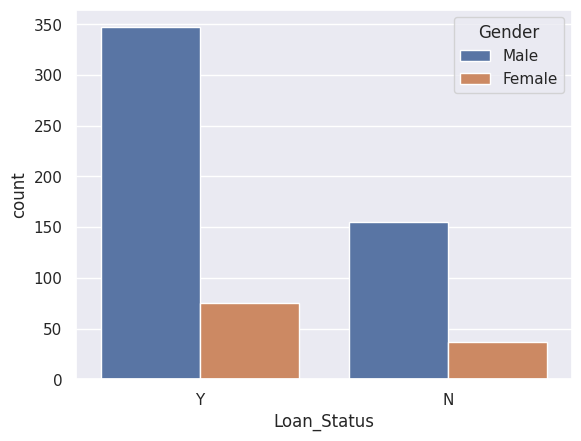

In [ ]:
sns.countplot(data=train,x='Loan_Status',hue ='Gender')

**Check the Outlier**

<Axes: xlabel='ApplicantIncome'>

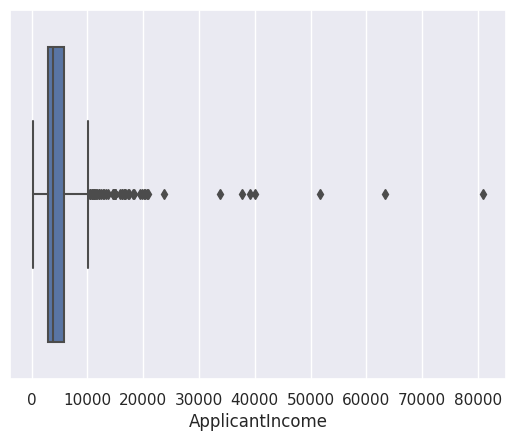

In [ ]:
sns.boxplot(x=train['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

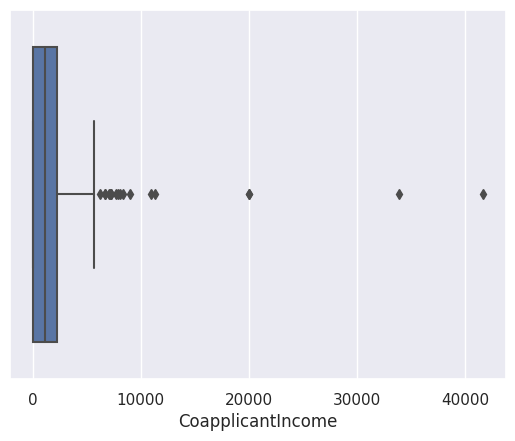

In [ ]:
sns.boxplot(x=train['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

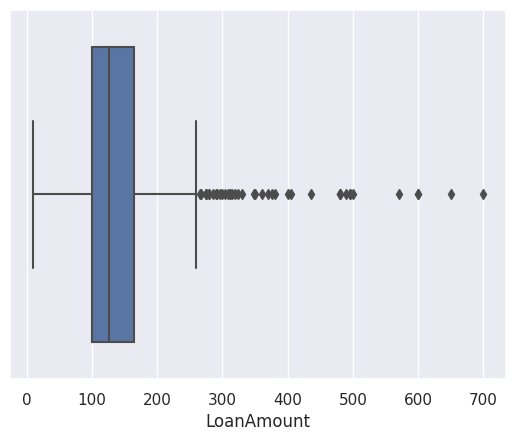

In [ ]:
sns.boxplot(x=train['LoanAmount'])

**Data Visualization**

<Axes: title={'center': 'Loan Status Bar Plot'}, xlabel='Loan Status Y - Yes or N- No', ylabel='Loan Status Count'>

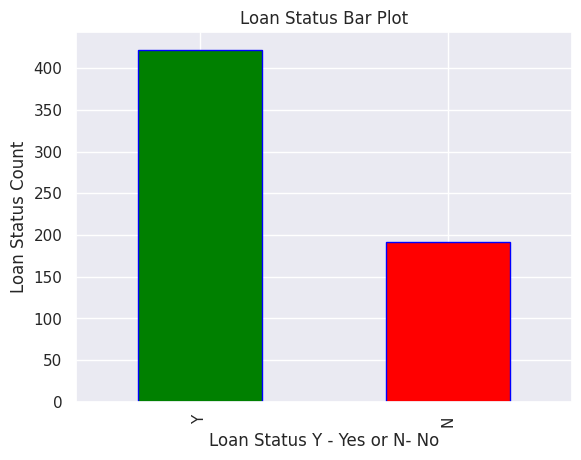

In [ ]:
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status Y - Yes or N- No')
plt.ylabel('Loan Status Count')

train['Loan_Status'].value_counts().plot.bar(color=['green', 'red'],edgecolor='blue')

<Axes: title={'center': 'Credit History'}>

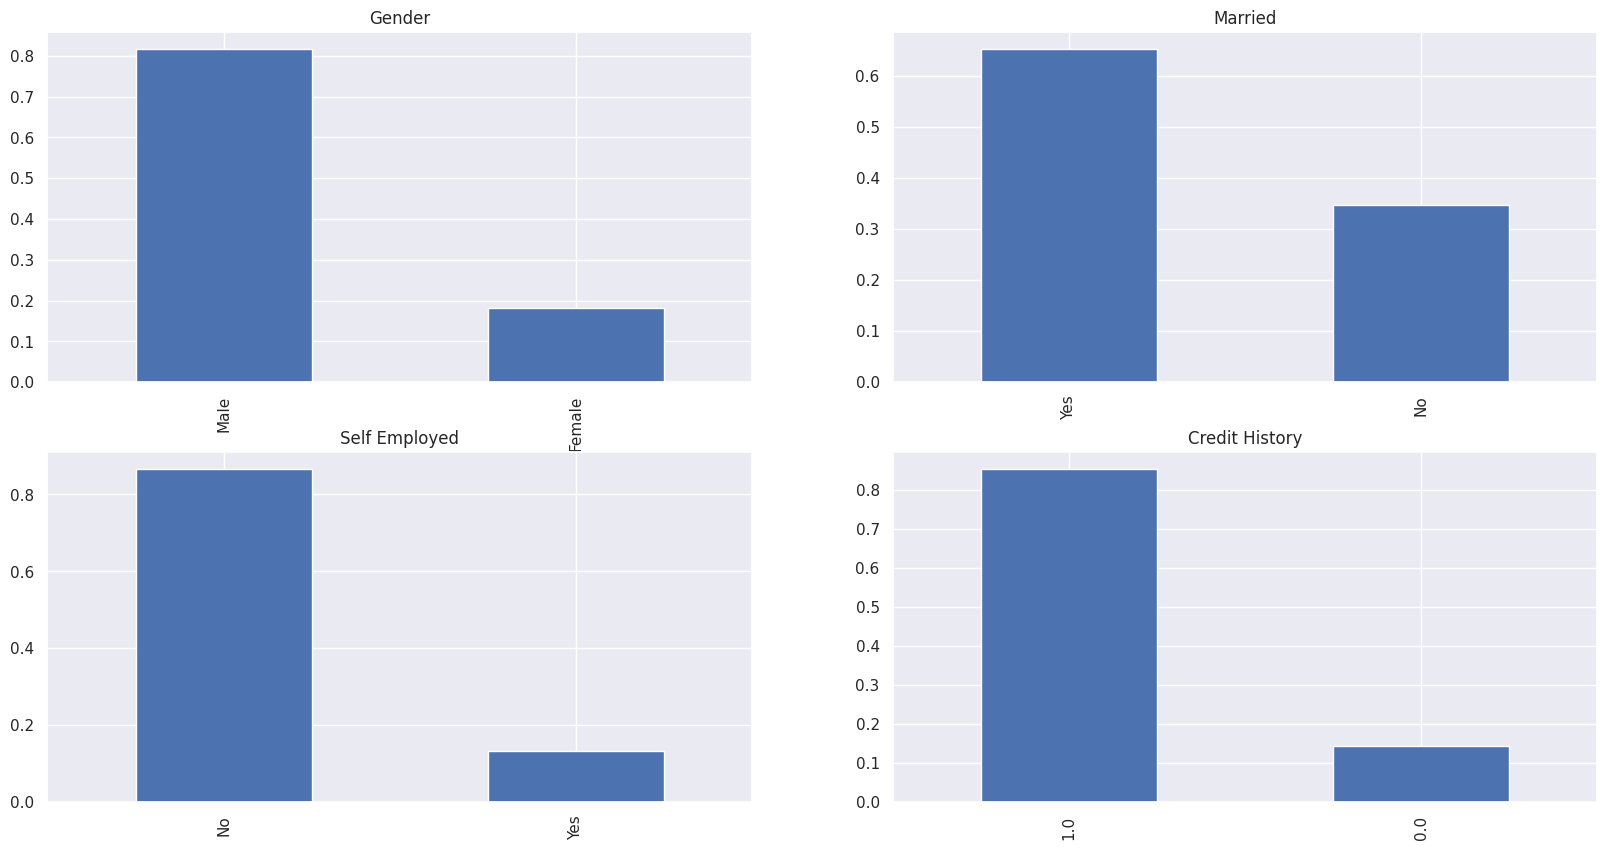

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

<Axes: xlabel='Property_Area'>

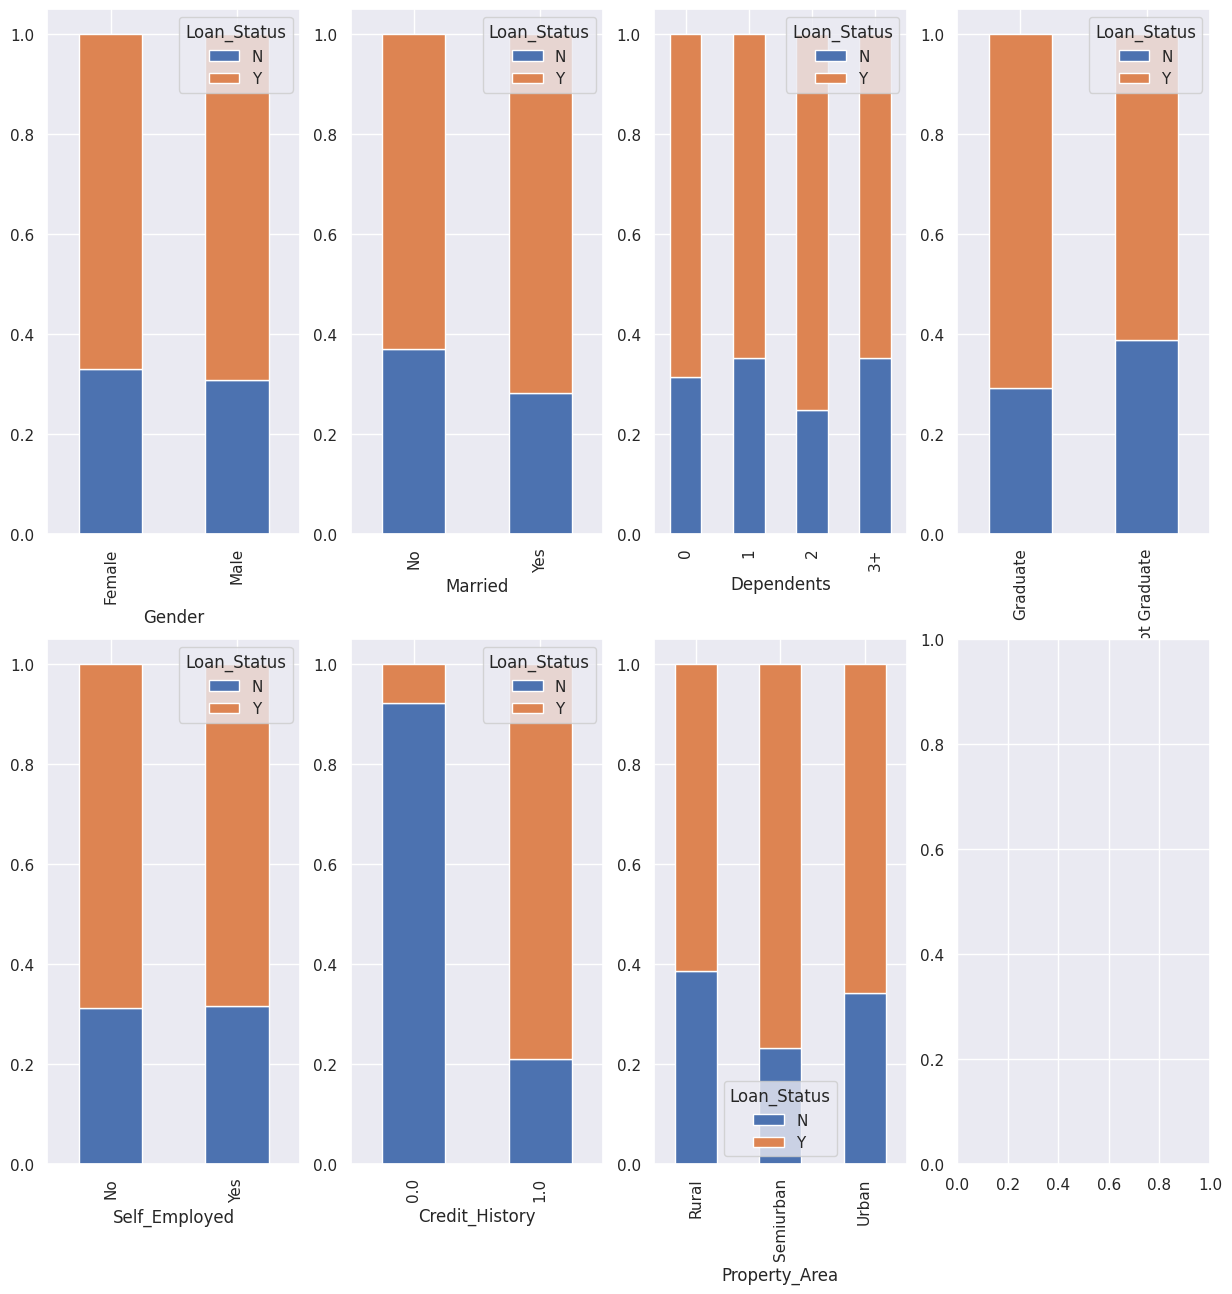

In [ ]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,2])

**Converting the categorical data into numerical data appropriately**

scikit-learn only accepts numerical variables. Hence, we need to convert all categorical variables into numeric types.

In [ ]:
X=train.drop(["Loan_Status",'Loan_ID'],axis=1)
y=train["Loan_Status"]

X = pd.get_dummies(X,drop_first=True)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

 **Fitting the dataset to various models**

**1) Logistic Regression**

In [ ]:
logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred = logistic_Regression.predict(x_test)

In [ ]:
log = accuracy_score(y_pred,y_test)*100

In [ ]:
print(confusion_matrix(y_pred,y_test))

[[ 24   3]
 [ 27 131]]


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           N       0.47      0.89      0.62        27
           Y       0.98      0.83      0.90       158

    accuracy                           0.84       185
   macro avg       0.72      0.86      0.76       185
weighted avg       0.90      0.84      0.86       185



**2) KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
KNeighborsClassifier(n_neighbors=200)
pred_knn = knn.predict(x_test)
KNN = accuracy_score(pred_knn,y_test)*100
print(confusion_matrix(pred_knn,y_test))

[[  0   0]
 [ 51 134]]


In [ ]:
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00         0
           Y       1.00      0.72      0.84       185

    accuracy                           0.72       185
   macro avg       0.50      0.36      0.42       185
weighted avg       1.00      0.72      0.84       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
error=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
print(error)

[0.43243243243243246, 0.4864864864864865, 0.40540540540540543, 0.42162162162162165, 0.372972972972973, 0.3891891891891892, 0.3675675675675676, 0.372972972972973, 0.31891891891891894, 0.35135135135135137, 0.3081081081081081, 0.34594594594594597, 0.32432432432432434, 0.33513513513513515, 0.32432432432432434, 0.31351351351351353, 0.2972972972972973, 0.32972972972972975, 0.3027027027027027, 0.31351351351351353, 0.2972972972972973, 0.31351351351351353, 0.2972972972972973, 0.2972972972972973, 0.2864864864864865, 0.2918918918918919, 0.2810810810810811, 0.2864864864864865, 0.2810810810810811, 0.2810810810810811, 0.2810810810810811, 0.2864864864864865, 0.2918918918918919, 0.2864864864864865, 0.2810810810810811, 0.2810810810810811, 0.2756756756756757, 0.2810810810810811, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757]


Text(0, 0.5, 'error rate')

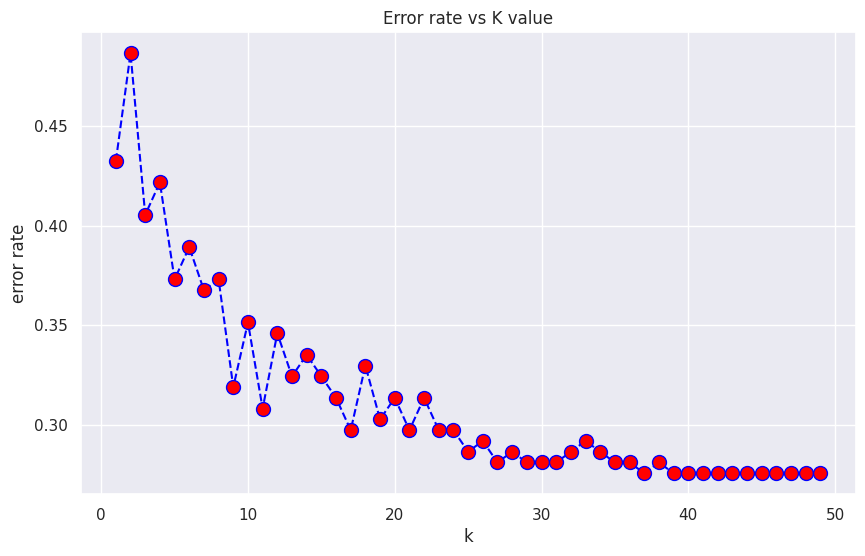

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

**3) Naive-Bayes**

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
pred_gnb = gnb.predict(x_test)
GNB = accuracy_score(pred_gnb,y_test)*100
print(confusion_matrix(pred_gnb,y_test))

[[ 22   4]
 [ 29 130]]


In [ ]:
print(classification_report(pred_gnb,y_test))

              precision    recall  f1-score   support

           N       0.43      0.85      0.57        26
           Y       0.97      0.82      0.89       159

    accuracy                           0.82       185
   macro avg       0.70      0.83      0.73       185
weighted avg       0.89      0.82      0.84       185



**4) SVM**

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
SVC = accuracy_score(pred_svc,y_test)*100
print(confusion_matrix(pred_svc,y_test))

[[  0   0]
 [ 51 134]]


In [ ]:
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00         0
           Y       1.00      0.72      0.84       185

    accuracy                           0.72       185
   macro avg       0.50      0.36      0.42       185
weighted avg       1.00      0.72      0.84       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5) Decision Tree - Entropy**

In [ ]:
dtree_en = DecisionTreeClassifier(criterion='entropy',splitter='random',max_leaf_nodes=5,min_samples_leaf=10,max_depth=3)
clf = dtree_en.fit(x_train,y_train)
pred_dt = clf.predict(x_test)
DTREE = accuracy_score(pred_dt,y_test)*100
cm=confusion_matrix(y_test,pred_dt)
print(cm)

[[ 21  30]
 [  2 132]]


In [ ]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



**6) Decision Tree - Gini**

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=5,min_samples_leaf=10,max_depth=5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,
                       splitter='random')

In [ ]:
pred_g = dtree.predict(x_test)
DTREE_G = accuracy_score(y_test,pred_g)*100
cm=confusion_matrix(y_test,pred_g)
print(cm)

[[ 21  30]
 [  2 132]]


In [ ]:
print(classification_report(y_test,pred_g))

              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



**7) Random Forest**

In [ ]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators=400)
rfc.fit(x_train, y_train)
pred_rf= rfc.predict(x_test)
RFC = accuracy_score(y_test,pred_rf)*100
RFC

79.45945945945945

In [ ]:
print(confusion_matrix(pred_rf,y_test))

[[ 21   8]
 [ 30 126]]


In [ ]:
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           N       0.41      0.72      0.53        29
           Y       0.94      0.81      0.87       156

    accuracy                           0.79       185
   macro avg       0.68      0.77      0.70       185
weighted avg       0.86      0.79      0.82       185



**8) AdaBoost (Entropy-Decision Tree)**

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=0),
                   n_estimators=80, random_state=0)

In [ ]:
pred = adaboost.predict(x_test)

In [ ]:
ada = accuracy_score(y_test,pred)*100

**9) AdaBoost (Gini-Decision Tree)**

In [ ]:
model_g = DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=0)
adaboost1 = AdaBoostClassifier(n_estimators=90, base_estimator=model_g,random_state=0)
adaboost1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=0),
                   n_estimators=90, random_state=0)

In [ ]:
pred_gini = adaboost.predict(x_test)
g = accuracy_score(y_test,pred_gini)*100

**10) XGBoost**

In [ ]:
xgb =  XGBClassifier(learning_rate =0.000001,n_estimators=1000,max_depth=5,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)

In [ ]:
xgb.fit(x_train,y_train)
predxg = xgb.predict(x_test)
xg = accuracy_score(y_test,predxg)*100

ValueError: ignored

In [ ]:
print("1)  Logistic Regression    :",log)
print("2)  AdaBoost - Entropy     :",ada)
print("3)  AdaBoost - Gini        :",g)
# print("4)  XGBoost                :",xg)
print("5)  Decision Tree - Entropy:",DTREE)
print("6)  Decision Tree - Gini   :",DTREE_G)
print("7)  Random Forest          :",RFC)
print("8)  Naive-Bayes            :",GNB)
print("9)  KNN                    :",KNN)
print("10) SVC                    :",SVC)

1)  Logistic Regression    : 83.78378378378379
2)  AdaBoost - Entropy     : 81.62162162162161
3)  AdaBoost - Gini        : 81.62162162162161
5)  Decision Tree - Entropy: 82.70270270270271
6)  Decision Tree - Gini   : 82.70270270270271
7)  Random Forest          : 79.45945945945945
8)  Naive-Bayes            : 82.16216216216216
9)  KNN                    : 72.43243243243244
10) SVC                    : 72.43243243243244


**Exporting the Model using Pickle**

In [ ]:
import pickle
pickle.dump(logistic_Regression,open('model.pkl','wb'))